In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path
from netCDF4 import Dataset
# This is the BMI LSTM that we will be running
import bmi_lstm

In [2]:
# This sample dataset comes from NeuralHydrology: 
# https://github.com/neuralhydrology/neuralhydrology/tree/master/test/test_data/camels_us/hourly
sample_data = Dataset('./data/usgs-streamflow-nldas_hourly.nc', 'r')
# Four basins are included in this sample
sample_basins = {sample_data['basin'][x]:x for x in range(len(list(sample_data['basin'])))}

# Test the model with the limited input

In [8]:
# Create an instance of the LSTM model with BMI
model_limited = bmi_lstm.bmi_LSTM()

In [9]:
# Initialize the model with a configuration file
model_limited.initialize(bmi_cfg_file=Path('./bmi_config_files/01022500_hourly_slope_mean_precip_temp.yml'))

In [10]:
# The basin listed in the configuration has to be included in the sample basins for this example to run
# This is the location of the example basin in the sample data provided
ibasin = sample_basins[model_limited.cfg_bmi['basin_id']]
# Note that this model can run on any basin, but this example include observations from specific basins

In [11]:
# Run the model with sample data

# Store the output in a list, so we can plot it afterwards
runoff_output_list_limited = []

# Loop through the sample data
for precip, temp in zip(list(sample_data['total_precipitation'][ibasin].data),
                        list(sample_data['temperature'][ibasin].data)):
    
    # Set the model forcings to those in the sample data
    model_limited.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux',precip)
    model_limited.set_value('land_surface_air__temperature',temp)

    # Updating the model calculates the runoff from the inputs and the model state at this time step
    model_limited.update()

    # Add the output to a list so we can plot
    runoff_output_list_limited.append(model_limited.surface_runoff_mm)

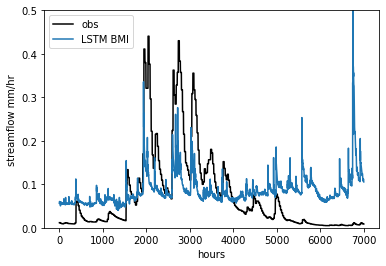

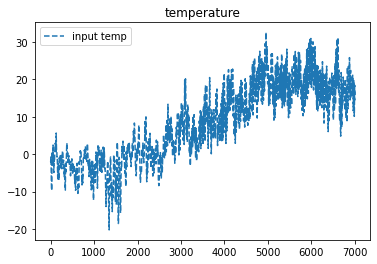

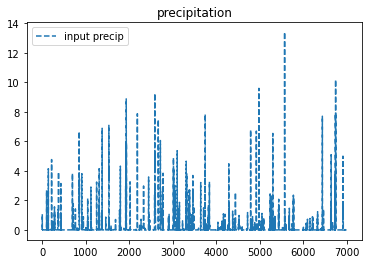

In [12]:
# Plot a portion of the output.

start_plot=17000
end_plot  =24000
plt.plot(sample_data['qobs_CAMELS_mm_per_hour'][ibasin][start_plot:end_plot], label='obs', c='k')
plt.plot(runoff_output_list_limited[start_plot:end_plot],label='LSTM BMI')
plt.ylim([0,0.5])
plt.ylabel('streamflow mm/hr')
plt.xlabel('hours')
plt.legend()
plt.show()
plt.close()
plt.plot(list(sample_data['temperature'][ibasin].data)[start_plot:end_plot], '--', label='input temp')
plt.title('temperature')
plt.legend()
plt.show()
plt.close()
plt.plot(list(sample_data['total_precipitation'][ibasin].data)[start_plot:end_plot], '--', label='input precip')
plt.title('precipitation')
plt.legend()

# Test the model with the complete set of input

In [3]:
# Create an instance of the LSTM model with BMI
model_all = bmi_lstm.bmi_LSTM()

In [4]:
# Initialize the model with a configuration file
model_all.initialize(bmi_cfg_file=Path('./bmi_config_files/01022500_hourly_all_attributes_forcings.yml'))

In [5]:
# The basin listed in the configuration has to be included in the sample basins for this example to run
# This is the location of the example basin in the sample data provided
ibasin = sample_basins[model_all.cfg_bmi['basin_id']]
# Note that this model can run on any basin, but this example include observations from specific basins

In [6]:
# Run the model with sample data

# Store the output in a list, so we can plot it afterwards
runoff_output_list_all = []

# Loop through the sample data
for precip, temp, lw, sw, shum, pres, w_u, w_v in zip(list(sample_data['total_precipitation'][ibasin].data),
                        list(sample_data['temperature'][ibasin].data),
                        list(sample_data['longwave_radiation'][ibasin].data),
                        list(sample_data['shortwave_radiation'][ibasin].data),
                        list(sample_data['specific_humidity'][ibasin].data),
                        list(sample_data['pressure'][ibasin].data),
                        list(sample_data['wind_u'][ibasin].data),
                        list(sample_data['wind_v'][ibasin].data)):
    
    # Set the model forcings to those in the sample data
    model_all.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux',precip)
    model_all.set_value('land_surface_air__temperature',temp)
    model_all.set_value('land_surface_radiation~incoming~longwave__energy_flux',lw)
    model_all.set_value('land_surface_radiation~incoming~shortwave__energy_flux',sw)
    model_all.set_value('atmosphere_air_water~vapor__relative_saturation',shum)
    model_all.set_value('land_surface_air__pressure',pres)
    model_all.set_value('land_surface_wind__x_component_of_velocity',w_u)
    model_all.set_value('land_surface_wind__y_component_of_velocity',w_v)

    # Updating the model calculates the runoff from the inputs and the model state at this time step
    model_all.update()

    # Add the output to a list so we can plot
    runoff_output_list_all.append(model_all.surface_runoff_mm)

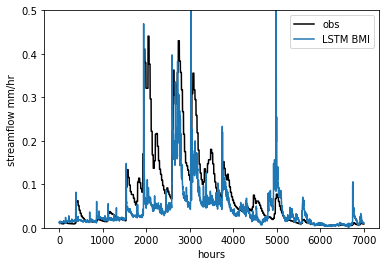

In [7]:
# Plot a portion of the output.

start_plot=17000
end_plot  =24000
plt.plot(sample_data['qobs_CAMELS_mm_per_hour'][ibasin][start_plot:end_plot], label='obs', c='k')
plt.plot(runoff_output_list_all[start_plot:end_plot],label='LSTM BMI')
plt.ylim([0,0.5])
plt.ylabel('streamflow mm/hr')
plt.xlabel('hours')
plt.legend()
plt.show()
plt.close()

In [ ]:
plt.plot(list(sample_data['temperature'][ibasin].data)[start_plot:end_plot], '--', label='input temp')
plt.title('temperature')
plt.legend()
plt.show()
plt.close()

plt.plot(list(sample_data['total_precipitation'][ibasin].data)[start_plot:end_plot], '--', label='input precip')
plt.title('precipitation')
plt.legend()
plt.show()
plt.close()

plt.plot(list(sample_data['specific_humidity'][ibasin].data)[start_plot:end_plot], '--', label='input precip')
plt.title('precipitation')
plt.legend()
plt.show()
plt.close()